In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
df = pd.read_csv("database.csv")

In [50]:
df.head()

PASSENGER_ID BOOKING_DATE FLIGHT_NUMBER FLIGHT_DEPARTURE_DATE  \
0     290344686    1/01/2012            SA             13-Jan-13   
1     247630864    1/01/2012            WB              4-May-13   
2     491321871    1/01/2012            SA             13-Jan-13   
3     443821994    1/01/2012            SA              5-Jan-13   
4     476584402    1/01/2012            SA              5-Jan-13   

  PASSENGER_ZIP_CODE PASSENGER_COUNTRY_CODE   AGE  \
0               2075                    AUS  55.0   
1               4118                    AUS  48.0   
2               2232                    AUS  53.0   
3               2171                    AUS  52.0   
4               2171                    AUS  18.0   

  BOOKING_TRAVEL_AGENCY_ZIP_CODE AIR_FLIGHT_COMPANY_NAME GENDER_CODE  \
0                           2022                       A           M   
1                           2060                       A           F   
2                           2060                       A           F   
3                           2606                       A           M   
4                           2606                       A           M   

   PROFIT (AUD)  
0       2909.79  
1       1119.92  
2       2447.96  
3       1088.35  
4        739.83

In [51]:
df.dtypes

PASSENGER_ID                        int64
BOOKING_DATE                       object
FLIGHT_NUMBER                      object
FLIGHT_DEPARTURE_DATE              object
PASSENGER_ZIP_CODE                 object
PASSENGER_COUNTRY_CODE             object
AGE                               float64
BOOKING_TRAVEL_AGENCY_ZIP_CODE     object
AIR_FLIGHT_COMPANY_NAME            object
GENDER_CODE                        object
PROFIT (AUD)                      float64
dtype: object

In [57]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# Convert date columns to date format
df["BOOKING_DATE"] = pd.to_datetime(df["BOOKING_DATE"], dayfirst = True)
df["FLIGHT_DEPARTURE_DATE"] = pd.to_datetime(df["FLIGHT_DEPARTURE_DATE"], dayfirst = True)

In [58]:
df.dtypes

PASSENGER_ID                               int64
BOOKING_DATE                      datetime64[ns]
FLIGHT_NUMBER                             object
FLIGHT_DEPARTURE_DATE             datetime64[ns]
PASSENGER_ZIP_CODE                        object
PASSENGER_COUNTRY_CODE                    object
AGE                                      float64
BOOKING_TRAVEL_AGENCY_ZIP_CODE            object
AIR_FLIGHT_COMPANY_NAME                   object
GENDER_CODE                               object
PROFIT (AUD)                             float64
dtype: object

Missing Values

In [ ]:
df.isnull().sum()

PASSENGER_ID                      0
BOOKING_DATE                      0
FLIGHT_NUMBER                     0
FLIGHT_DEPARTURE_DATE             0
PASSENGER_ZIP_CODE                7
PASSENGER_COUNTRY_CODE            0
AGE                               1
BOOKING_TRAVEL_AGENCY_ZIP_CODE    1
AIR_FLIGHT_COMPANY_NAME           0
GENDER_CODE                       1
PROFIT (AUD)                      0
dtype: int64

In [63]:
df_booking = df[["PASSENGER_ID", "BOOKING_DATE", "FLIGHT_DEPARTURE_DATE", "AIR_FLIGHT_COMPANY_NAME"]].copy()

In [64]:
# Add column for difference between the booking dates and flight departure dates
df_booking["DIFFERENCE"] = (df_booking["FLIGHT_DEPARTURE_DATE"] - df_booking["BOOKING_DATE"]).dt.days

In [83]:
# Summary statistics for each company
summary_stats = df_booking.groupby("AIR_FLIGHT_COMPANY_NAME")["DIFFERENCE"].describe().round(2)
print(summary_stats)

                           count    mean     std  min    25%    50%    75%  \
AIR_FLIGHT_COMPANY_NAME                                                      
A                        37536.0  211.66  121.89  2.0  113.0  200.0  295.0   
B                         9611.0  223.58  143.42  4.0  108.0  207.0  317.0   
C                         1007.0  232.30  153.48  5.0  121.0  212.0  316.0   

                            max  
AIR_FLIGHT_COMPANY_NAME          
A                        1630.0  
B                        1794.0  
C                        1557.0  


<AxesSubplot: title={'center': 'DIFFERENCE'}, xlabel='AIR_FLIGHT_COMPANY_NAME'>

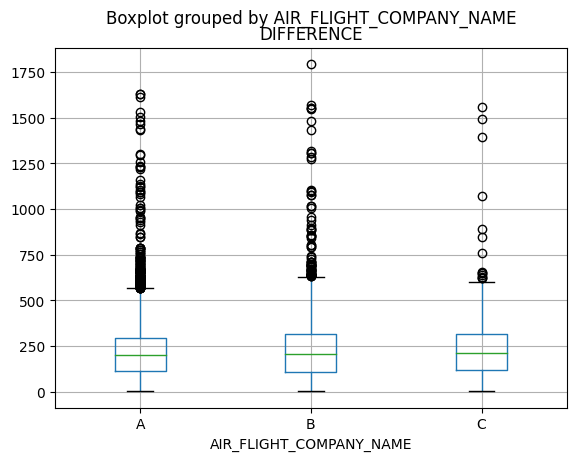

In [76]:
df_booking.boxplot(column = ["DIFFERENCE"], by = "AIR_FLIGHT_COMPANY_NAME")

array([[<AxesSubplot: title={'center': 'A'}>,
        <AxesSubplot: title={'center': 'B'}>],
       [<AxesSubplot: title={'center': 'C'}>, <AxesSubplot: >]],
      dtype=object)

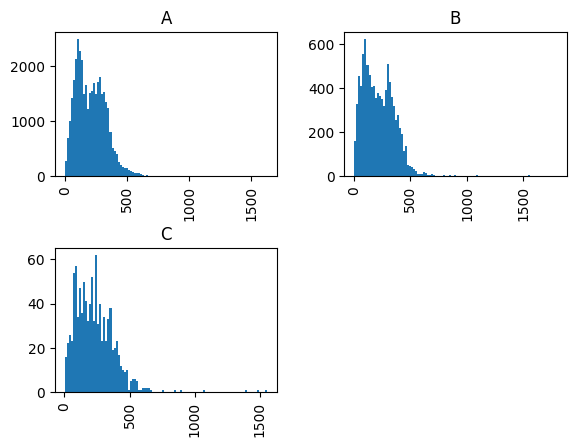

In [91]:
df_booking.hist(column = ["DIFFERENCE"], by = "AIR_FLIGHT_COMPANY_NAME", bins = 100)